## Adding noise to the linear model


Consensus dynamics without noise:

$\dot{\mathbf{x}} = -L \mathbf{x} = -D\mathbf{x} + A\mathbf{x}$

Consensus dynamics with noise:

$\dot{\mathbf{x}}  = -D \mathbf{x} + (A + \varepsilon)\mathbf{x}$

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from matplotlib.colors import Normalize
import numpy as np
import pylab

er = nx.erdos_renyi_graph(directed=True, n=20, p=np.random.rand(1)[0])

nx.draw(er)
plt.show()

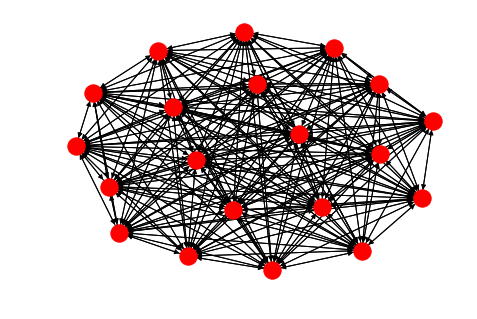

In [2]:
er = nx.complete_graph(20, create_using=nx.DiGraph())
nx.draw(er)
plt.show()

for u,v,a in er.edges(data=True):
    a['weight'] = 2*np.random.rand(1)[0] - 1

for i, n in er.nodes(data = True):
    n['decision'] = 2*np.random.rand(1)[0]-1

In [3]:
A = nx.adjacency_matrix(er)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D - A

In [4]:
np.linalg.matrix_rank(L)

19

#### initial conditions

In [5]:
dt = 0.002
u = 0.9
N = nx.number_of_nodes(er)
n_iter = 10000
x = np.zeros((n_iter, N))
y = np.zeros((n_iter, N))
rank = np.zeros(n_iter)
noise_mean = 0
noise_var = 1e-4


#x[0] = np.repeat(0.8, N)
x[0] = 0.8 + np.random.rand(N)/10
y[0] = x[0]


#### with noise

In [6]:
for iter in np.arange(0,n_iter-1):
    L_eps = L
    i = 1
    L_eps[i] = D[i] - A[i] - np.random.rand(N)*1e-4
    #L_eps[4] = L_eps[0] + np.random.normal(
    #    loc=noise_mean, 
    #    scale=noise_var,
    #    size=N)
    rank[iter] = np.linalg.matrix_rank(L_eps)
    dxdt = -L_eps.dot(x[iter])
    x[iter+1] = x[iter] + dxdt*dt

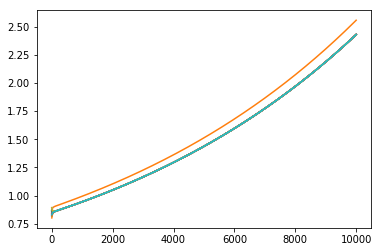

In [7]:
for i in np.arange(N):
    plt.plot(x[:,i])
plt.show()

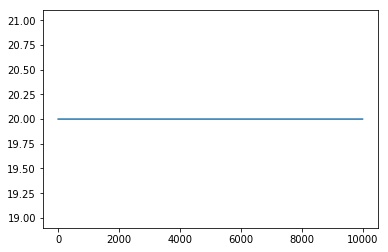

In [8]:
plt.plot(rank[:-1])

In [23]:
rank[0]

20.0

In [22]:
np.linalg.matrix_rank(L)

20

#### without noise

In [11]:
for iter in np.arange(0,n_iter-1):
    # pitchfork
    dxdt = -L.dot(y[iter])
    y[iter+1] = y[iter] + dxdt*dt

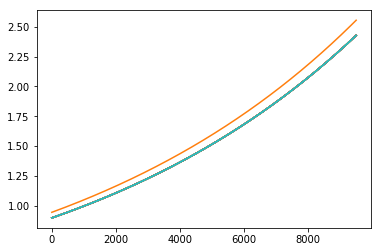

In [12]:
for i in np.arange(N):
    plt.plot(y[500:,i])
plt.show()

In [13]:
nx.degree_centrality(er)

{0: 2.0,
 1: 2.0,
 2: 2.0,
 3: 2.0,
 4: 2.0,
 5: 2.0,
 6: 2.0,
 7: 2.0,
 8: 2.0,
 9: 2.0,
 10: 2.0,
 11: 2.0,
 12: 2.0,
 13: 2.0,
 14: 2.0,
 15: 2.0,
 16: 2.0,
 17: 2.0,
 18: 2.0,
 19: 2.0}

In [14]:
nx.out_degree_centrality(er)

{0: 1.0,
 1: 1.0,
 2: 1.0,
 3: 1.0,
 4: 1.0,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0,
 11: 1.0,
 12: 1.0,
 13: 1.0,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 1.0}

In [15]:
nx.eigenvector_centrality(er)

{0: 0.223606797749979,
 1: 0.223606797749979,
 2: 0.223606797749979,
 3: 0.223606797749979,
 4: 0.223606797749979,
 5: 0.223606797749979,
 6: 0.223606797749979,
 7: 0.223606797749979,
 8: 0.223606797749979,
 9: 0.223606797749979,
 10: 0.223606797749979,
 11: 0.223606797749979,
 12: 0.223606797749979,
 13: 0.223606797749979,
 14: 0.223606797749979,
 15: 0.223606797749979,
 16: 0.223606797749979,
 17: 0.223606797749979,
 18: 0.223606797749979,
 19: 0.223606797749979}

In [16]:
u, s, v = np.linalg.svd(D-A)
s

array([2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 2.00000000e+01,
       2.00000000e+01, 2.00000000e+01, 2.00000000e+01, 1.47601932e-15])

In [17]:
nnodes = er.number_of_nodes()
deg = sum(d for n, d in er.in_degree()) / float(nnodes)
print(deg)
#info += "Average in degree: %8.4f\n" % deg
deg = sum(d for n, d in er.out_degree()) / float(nnodes)
print(deg)
#info += "Average out degree: %8.4f" % deg

19.0
19.0


In [18]:
[er.in_degree(i) for i in er.nodes()]

[19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19]

In [19]:
np.sum(A, axis=1)

matrix([[19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19],
        [19]])

In [20]:
x[999,:]

array([0.94432953, 0.99389416, 0.94432953, 0.94432953, 0.94432953,
       0.94432953, 0.94432953, 0.94432953, 0.94432953, 0.94432953,
       0.94432953, 0.94432953, 0.94432953, 0.94432953, 0.94432953,
       0.94432953, 0.94432953, 0.94432953, 0.94432953, 0.94432953])

In [21]:
x[0,:]

array([0.81711648, 0.86938553, 0.825699  , 0.86153907, 0.85619014,
       0.82264368, 0.83588168, 0.85004049, 0.88718433, 0.8385337 ,
       0.86324942, 0.80156608, 0.8674272 , 0.84181756, 0.89073623,
       0.83261235, 0.89281137, 0.87500101, 0.89308351, 0.82984887])